<a href="https://colab.research.google.com/github/ejshumaker/EECS504Project/blob/work/EECS504FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EECS 504 Final Project

### Bryan Edwards, Demba Komma, Leah Wu, Eric Shumaker
#### {bryaned, dbkomma, huiminwu, eshumake} @umich.edu


# Starting


In [46]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import cv2
import os

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")


PyTorch Version:  1.4.0
Torchvision Version:  0.5.0
Using the GPU!


## [1] Download Pascal VOC 2007 dataset.



In [2]:
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!tar -xf VOCtrainval_06-Nov-2007.tar

--2020-04-10 17:46:08--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  1.00MB/s    in 12m 33s 

2020-04-10 17:58:43 (597 KB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



# [1.1] Process images by masking center region

In [0]:
# Create directory structure for dataloader 
if os.path.exists('./data'):
  ! rm -r ./data
os.mkdir('./data')
os.mkdir('./data/train')
os.mkdir('./data/train/sub')
os.mkdir('./data/test')
os.mkdir('./data/test/sub')
train_path = './data/train/sub'
test_path = './data/test/sub'

In [0]:
def process_image(img_path):
    """
    Resizes and masks image in specified path.

    Input:
    - img_path: path to image

    Output:
    - Image of size (454,227,3) containing resized original image in left half and
      resized, masked image in right half
    """
    img = cv2.imread(img_path)
    img = cv2.resize(img, (227,227)) # Resize image to (227,227,3)

    # Create mask
    mask = 255 * np.ones_like(img)
    x,y,_ = mask.shape
    mask[int(x/3):int((2/3)*x), int(y/3):int((2/3)*y),:] = 0

    # Apply mask
    masked = cv2.bitwise_and(img,mask)

    # Concatenate original img with masked
    cat = np.hstack((img, masked))
    return cat


In [0]:
path = './VOCdevkit/VOC2007/JPEGImages'
images = []

for filename in os.listdir(path):
    img = process_image(os.path.join(path, filename))
    if img is not None:
        images.append(img)

# Take last 500 images as test data
train = images[:-500]
test = images[-500:]

# Add training images to train directory
if len(os.listdir(train_path)) == 0:
    for i, img in enumerate(train):
        img_path = train_path + '/%d.jpg' % (i + 1)
        cv2.imwrite(img_path, img)
else:
    print('Please empty {} directory.'.format(train_path))

# Add test images to test directory
if len(os.listdir(test_path)) == 0:
    for i, img in enumerate(test):
        img_path = test_path + '/%d.jpg' % (i + 1)
        cv2.imwrite(img_path, img)
else:
    print('Please empty {} directory.'.format(test_path))

## [2] Build dataloaders for train and test

In [0]:
def load_data(path, subfolder, transform, batch_size, shuffle=True):
    """
    Data loader.

    Inputs:
    - path: path of the data.
    - subfolder: subfolder of the data.
    - transform: data transformation.
    - batch_size: the size of the batch
    - shuffle: if true, shuffle the data

    Outputs:
    - torch Dataloader
    """
    direc = path + '/' + subfolder
    dset = datasets.ImageFolder(direc, transform=transform)
    dataloader = torch.utils.data.DataLoader(dset,batch_size=batch_size,shuffle=shuffle)
    return dataloader

In [0]:
# data_loader
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
train_loader = load_data('./data', 'train', transform, 1, shuffle=True)
test_loader = load_data('./data', 'test', transform, 10, shuffle=False)

#Sample Output used for visualization
test = test_loader.__iter__().__next__()[0]
img_size = test.size()[2]
fixed_y_ = test[:, :, :, 0:img_size]
fixed_x_ = test[:, :, :, img_size:]

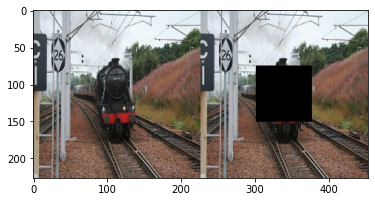

In [101]:
# plot sample image
example = train_loader.__iter__().__next__()[0][0].numpy().transpose((1, 2, 0))
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])
example = std * example + mean
plt.imshow(example)
plt.show()

## [3] Define Architecture

In [0]:
# TODO

## [4] Train



In [0]:
# TODO

## [5] Visualization



In [0]:
# TODO